# World Happiness Project

Subject of analysis: 
* Hangi ülkeler veya bölgeler genel mutlulukta ve mutluluğa katkıda bulunan altı faktörün her birinde en yüksek sırada yer alıyor?
* 2015-2016 ile 2016-2017 raporları arasında ülke sıralamaları veya puanları nasıl değişti?
* Herhangi bir ülke mutlulukta önemli bir artış veya azalma yaşadı

In [15]:

import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns


In [19]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df15 = pd.read_csv('2015.csv', delimiter=',', nrows = nRowsRead)
df15.dataframeName = '2015.csv'

df16 = pd.read_csv('2016.csv', delimiter=',', nrows = nRowsRead)
df16.dataframeName = '2016.csv'

df17 = pd.read_csv('2017.csv', delimiter=',', nrows = nRowsRead)
df17.dataframeName = '2017.csv'

df18 = pd.read_csv('2018.csv', delimiter=',', nrows = nRowsRead)
df18.dataframeName = '2018.csv'

df19 = pd.read_csv('2019.csv', delimiter=',', nrows = nRowsRead)
df19.dataframeName = '2019.csv'


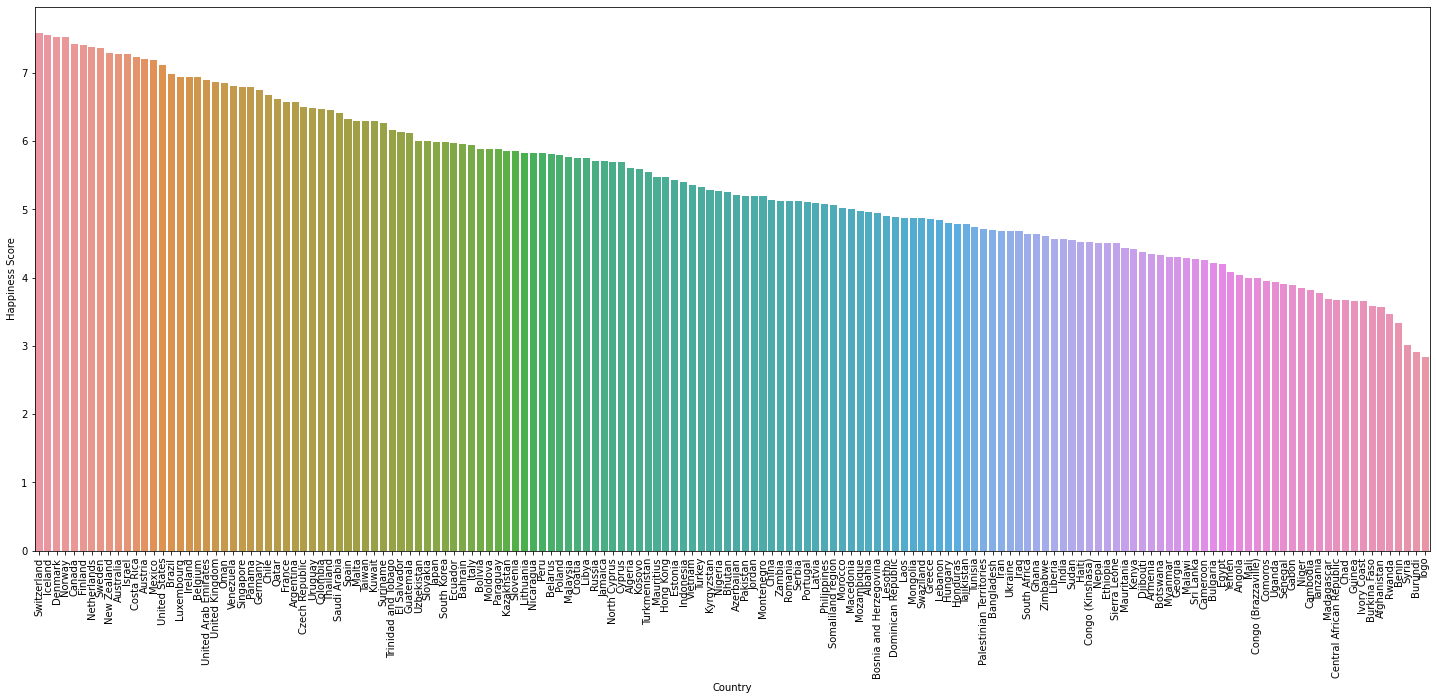

In [56]:
# happiness score for 2015.

plt.figure(figsize=(25, 10))
sns.barplot(x='Country', y='Happiness Score', data=df19)
plt.xticks(rotation=90)
plt.show()

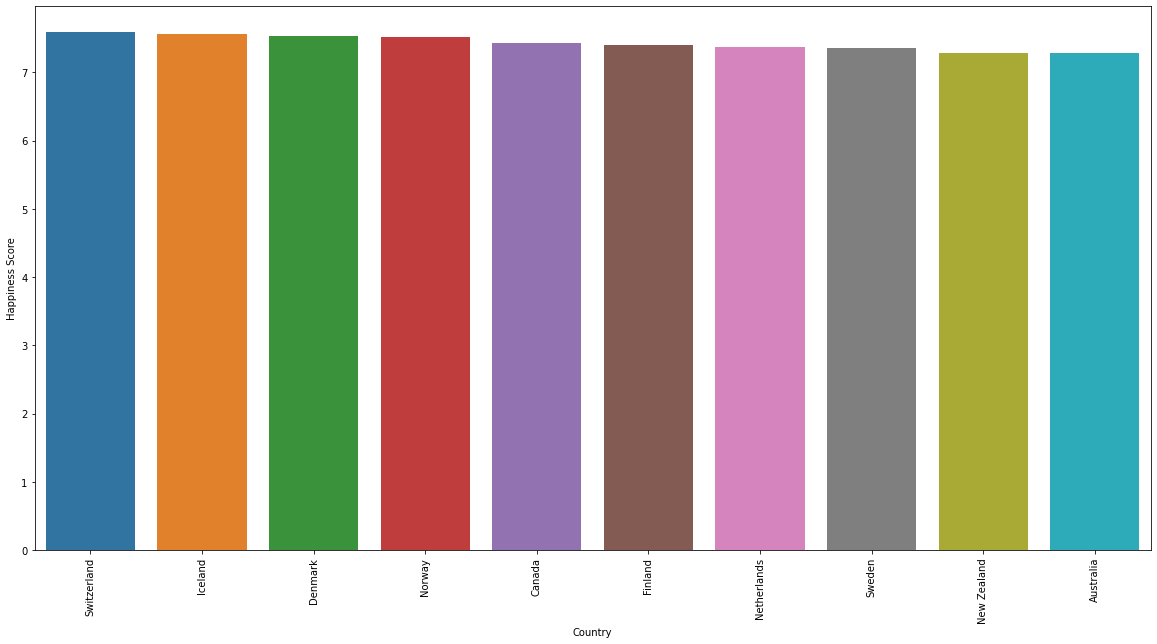

In [42]:
# top 10 countries for 2015
top10 = df15.sort_values(by = 'Happiness Score', ascending = False).head(10)
plt.figure(figsize=(20, 10))
sns.barplot(x = 'Country', y = 'Happiness Score', data = top10)
plt.xticks(rotation = 90)
plt.show()


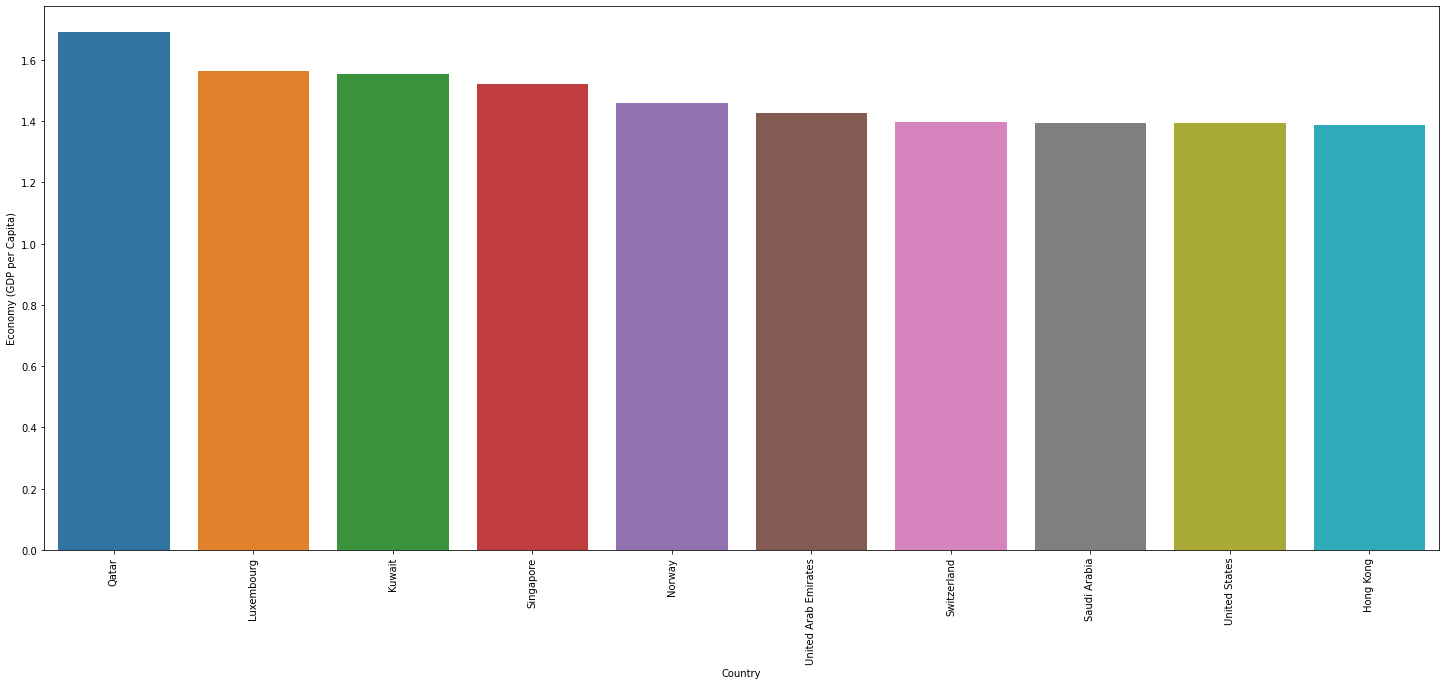

In [23]:
# Top 10 countries with the highest GDP per capita

top10_gdp = df1.sort_values(by = 'Economy (GDP per Capita)', ascending = False).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country', y = 'Economy (GDP per Capita)', data = top10_gdp)
plt.xticks(rotation = 90)
plt.show()



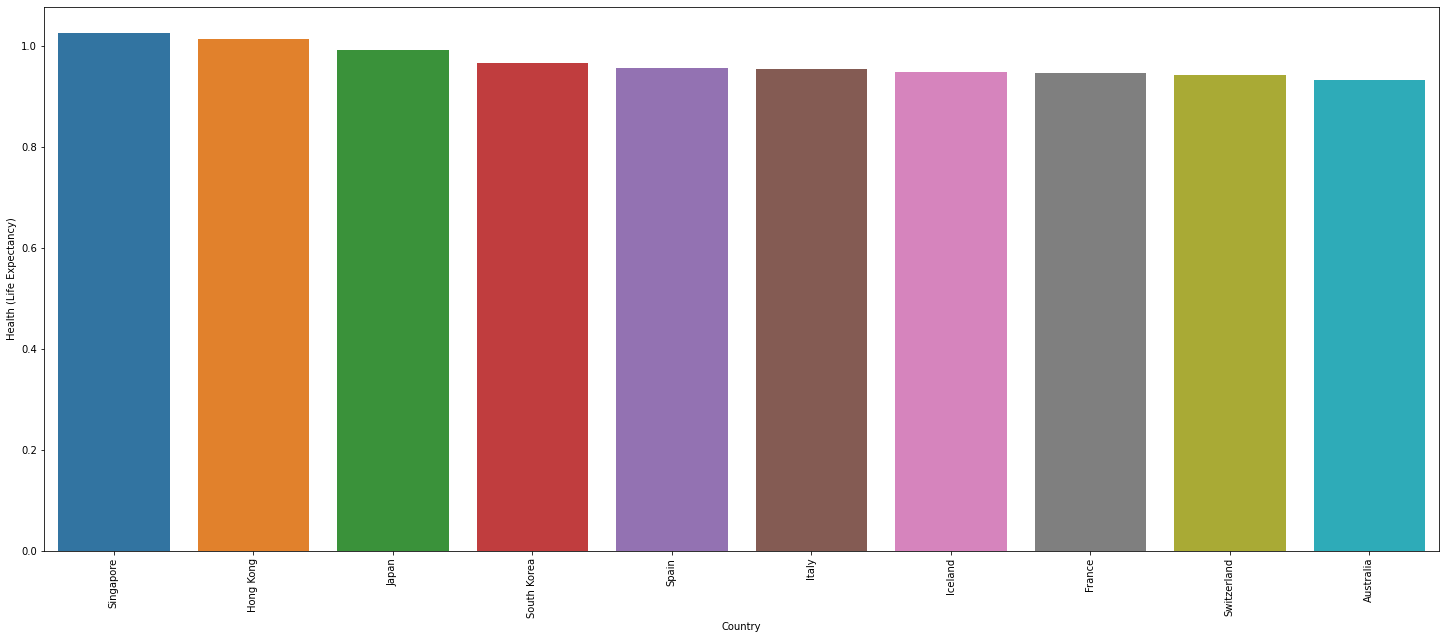

In [26]:
top10_social = df1.sort_values(by = 'Health (Life Expectancy)', ascending = False).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country', y = 'Health (Life Expectancy)', data = top10_social)
plt.xticks(rotation = 90)
plt.show()

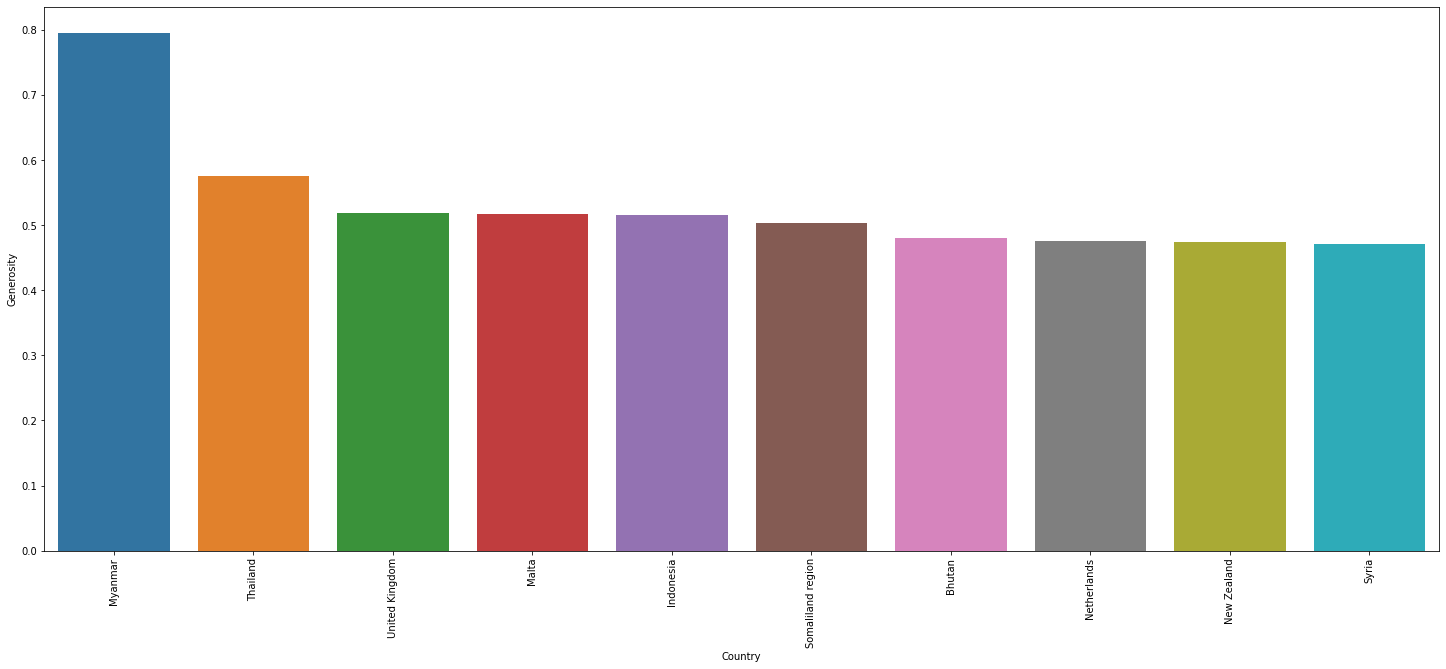

In [28]:
top10_health = df1.sort_values(by = 'Generosity', ascending = False).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country', y = 'Generosity', data = top10_health)
plt.xticks(rotation = 90)
plt.show()

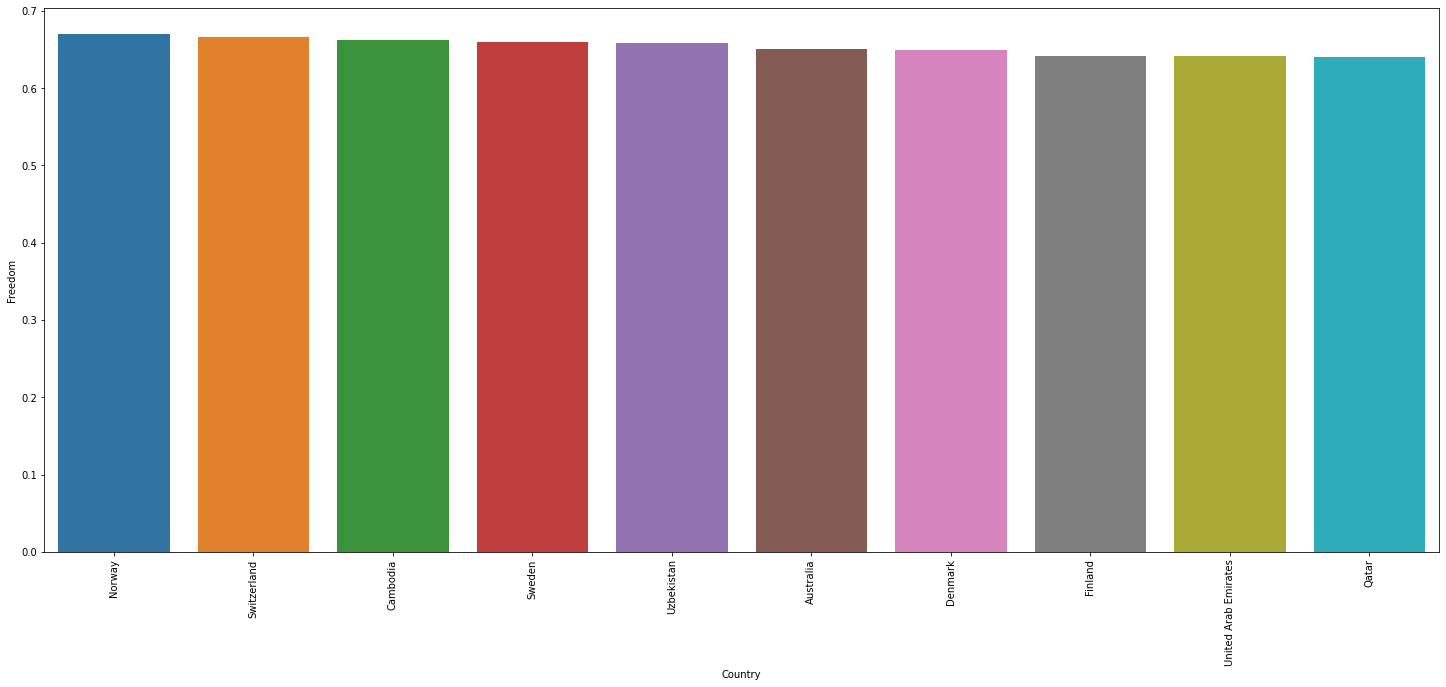

In [30]:
top10_freedom = df1.sort_values(by = 'Freedom', ascending = False).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country', y = 'Freedom', data = top10_freedom)
plt.xticks(rotation = 90)
plt.show()


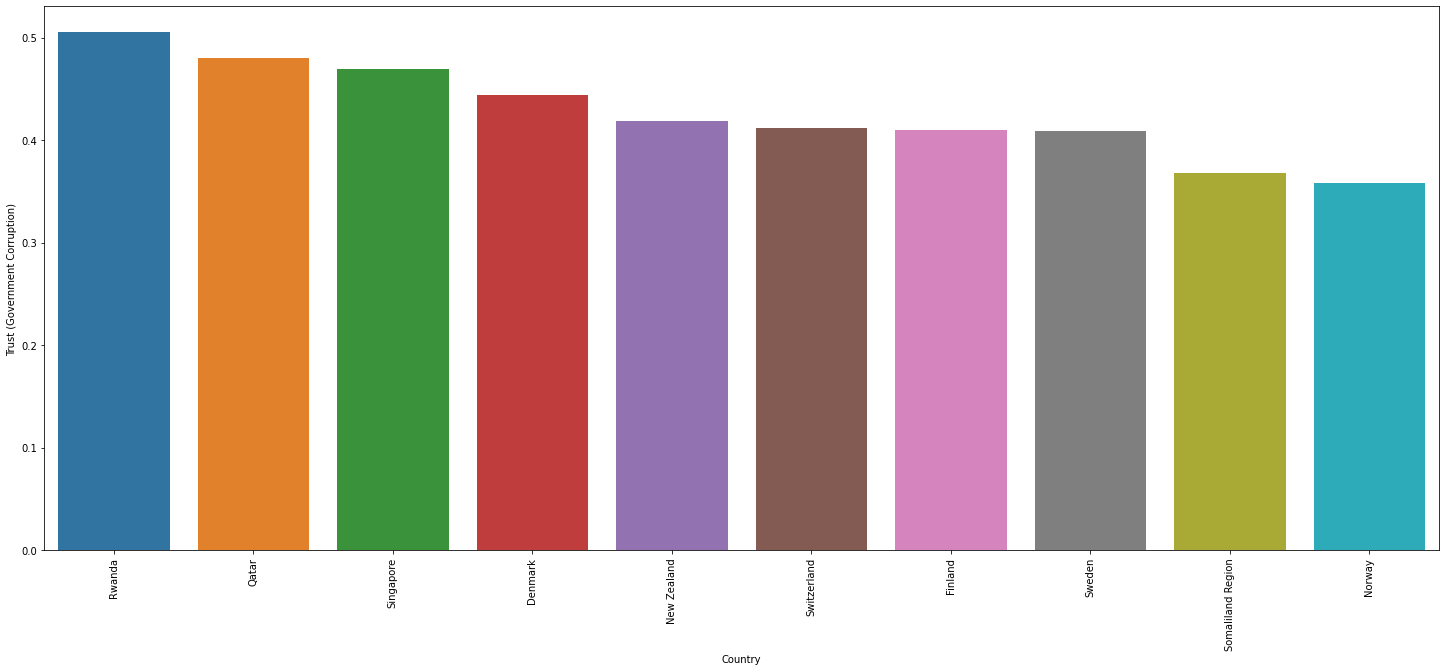

In [34]:
top10_social = df1.sort_values(by = 'Trust (Government Corruption)', ascending = False).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country', y = 'Trust (Government Corruption)' , data = top10_social)
plt.xticks(rotation = 90)
plt.show()

In [45]:
sc15=df15['Happiness Score'].mean()
sc16=df16['Happiness Score'].mean()
sc17=df17['Happiness.Score'].mean()
sc18=df18['Score'].mean()
sc19=df19['Score'].mean()
Hscore=np.array([sc15,sc16,sc17,sc18,sc19])
xx=np.arange(2015,2020,1)
yy=Hscore

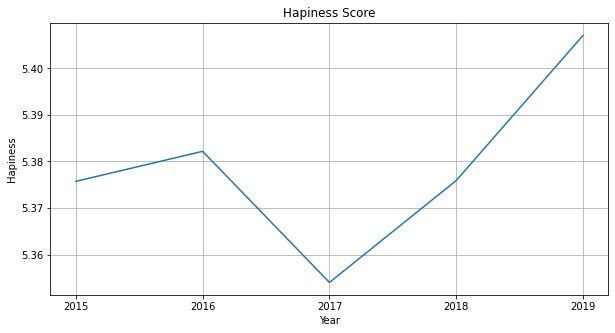

In [81]:
plt.figure(figsize=(10,5))
plt.grid(True)
plt.title("Hapiness Score")
plt.xlabel("Year")
plt.ylabel("Hapiness")
plt.xticks(xx, xx)

plt.plot(xx,yy)
plt.show()

### Difference between 2015-2016

In [170]:
import math
df16_arranged = df16.T.drop(["Lower Confidence Interval","Upper Confidence Interval"],inplace=False).T


df = abs(df15["Happiness Score"] -df16_arranged["Happiness Score"])

df = pd.DataFrame(df)
df_to_plot = pd.concat([df16["Country"], df],axis=1)
df_to_plot.dropna(inplace=True)


,Country,Happiness Score
152,Benin,0.091
153,Afghanistan,0.105
154,Togo,0.037
155,Syria,0.063
156,Burundi,0


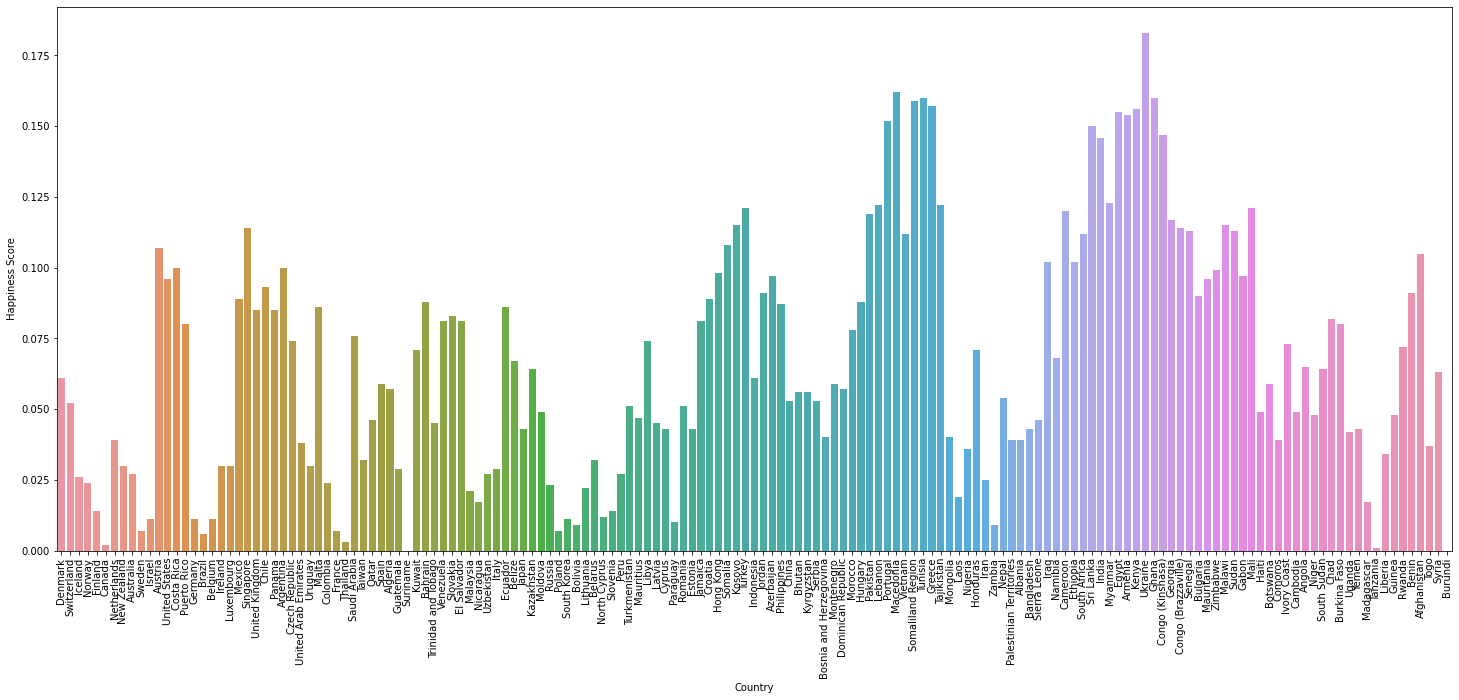

In [176]:

plt.figure(figsize=(25, 10))
sns.barplot(x='Country', y='Happiness Score', data=df_to_plot)
plt.xticks(rotation=90)
plt.show()

* There are dramatic changes in some countries from 2015 to 2016s

### Corolation between features and Happiness Score

In [20]:
df19.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [21]:
df19.rename(columns = {'Overall rank':'Happiness Score','Country or region':'Country'}, inplace = True)


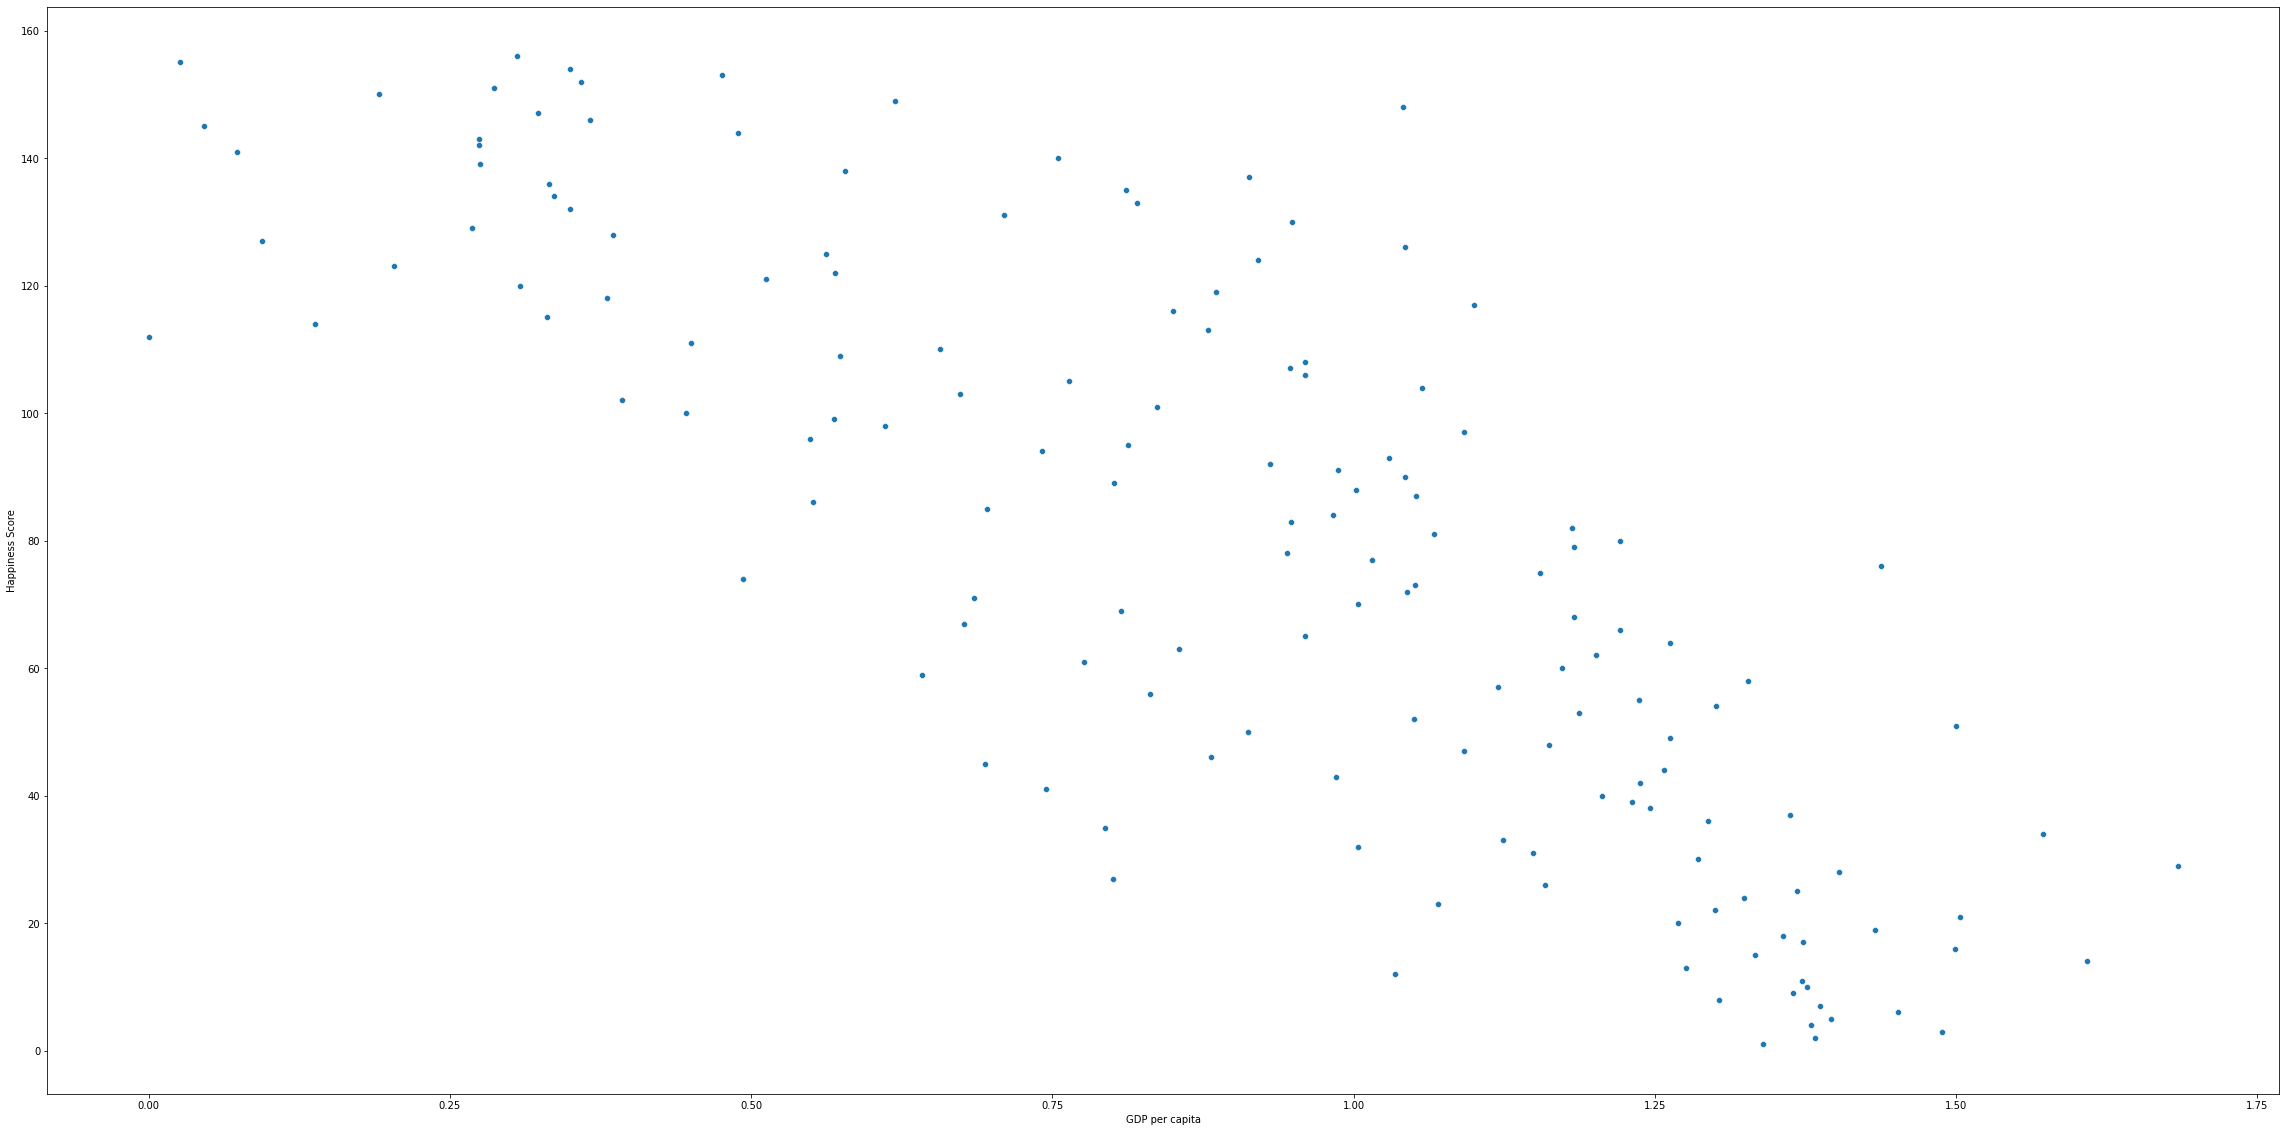

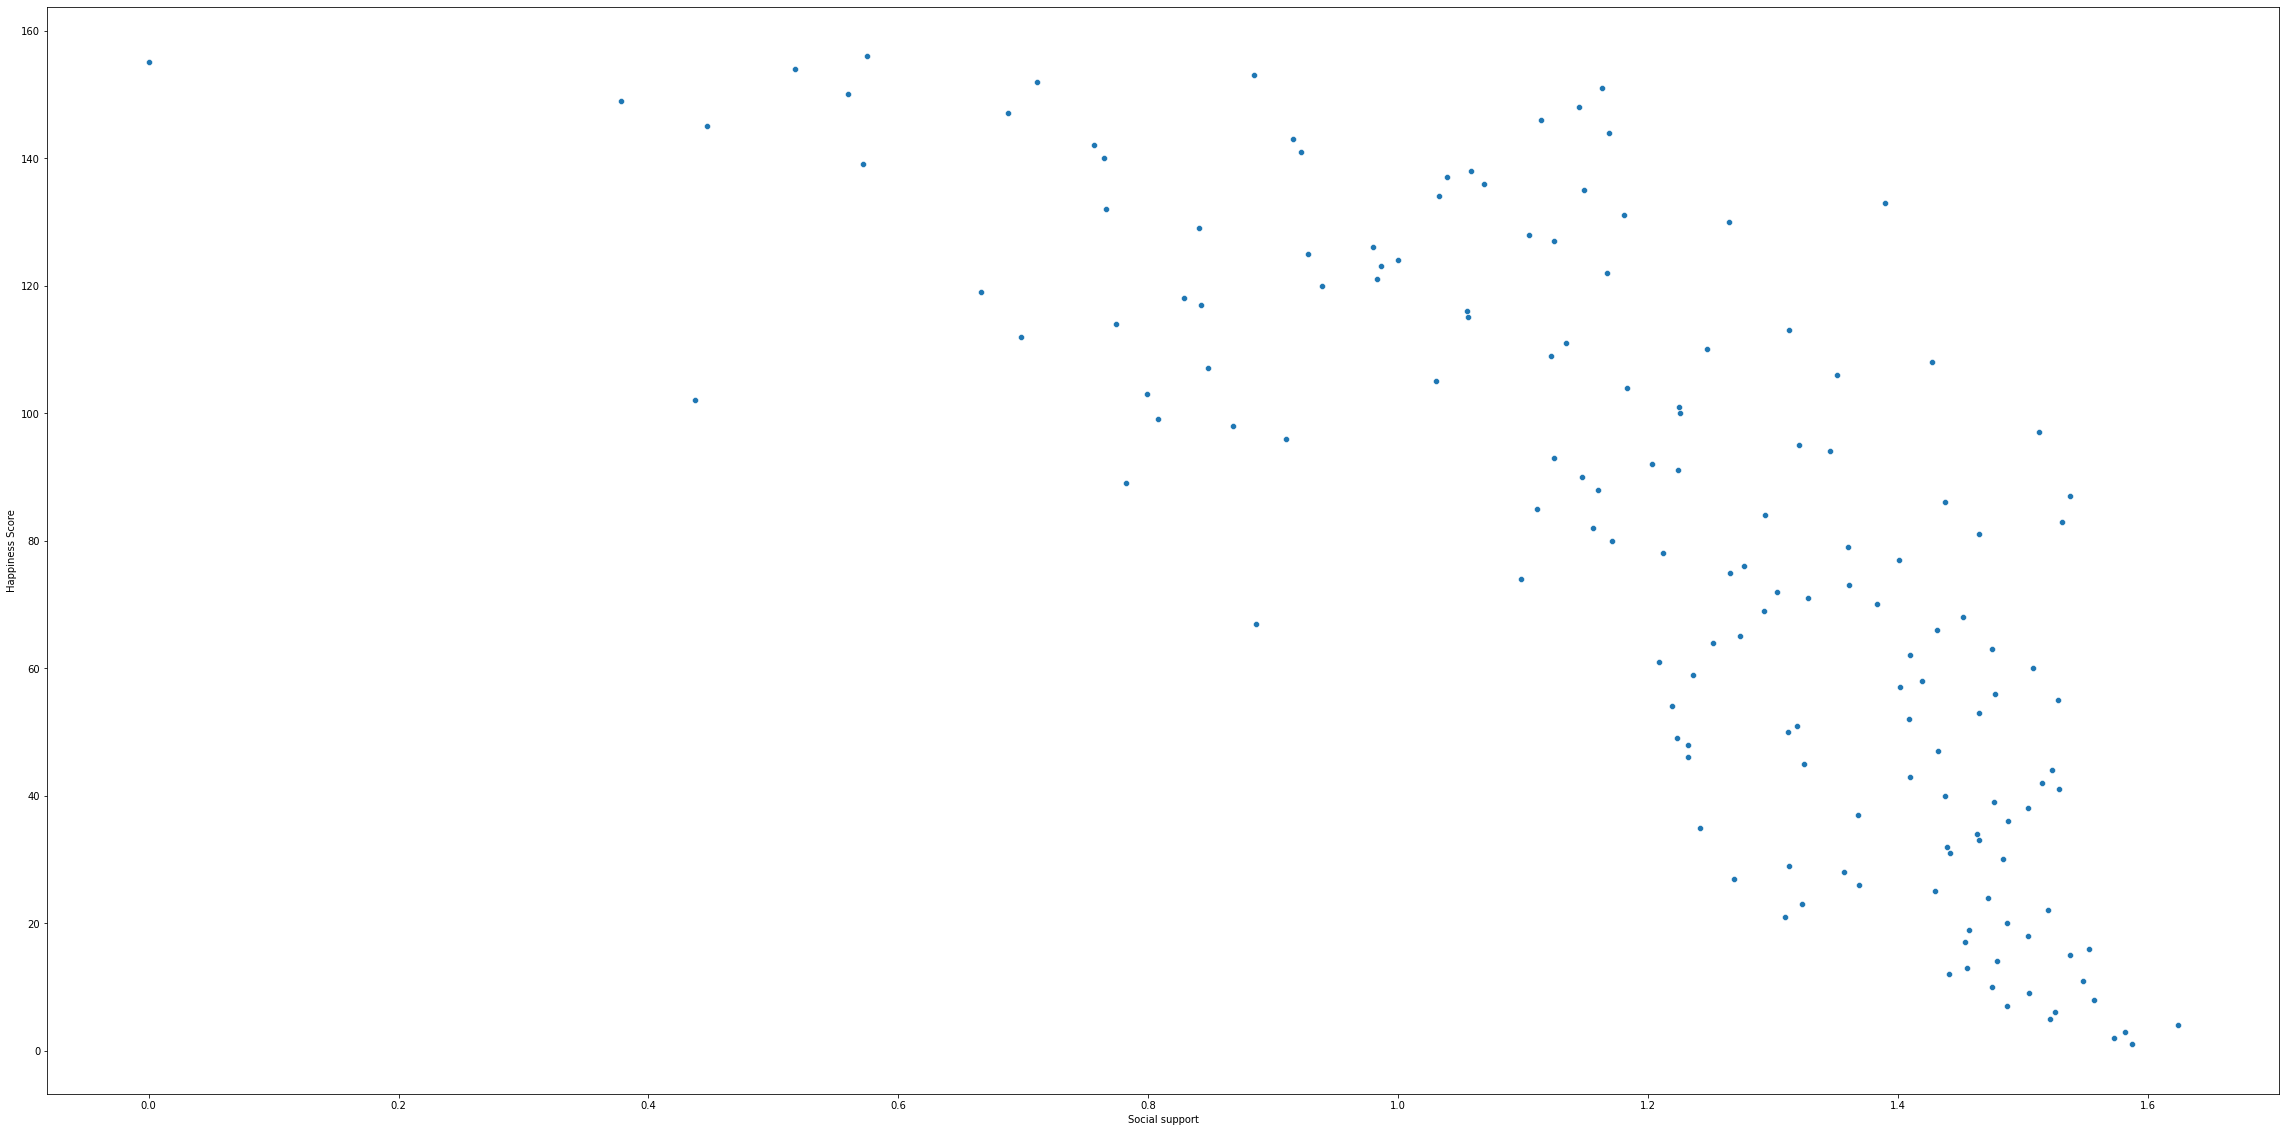

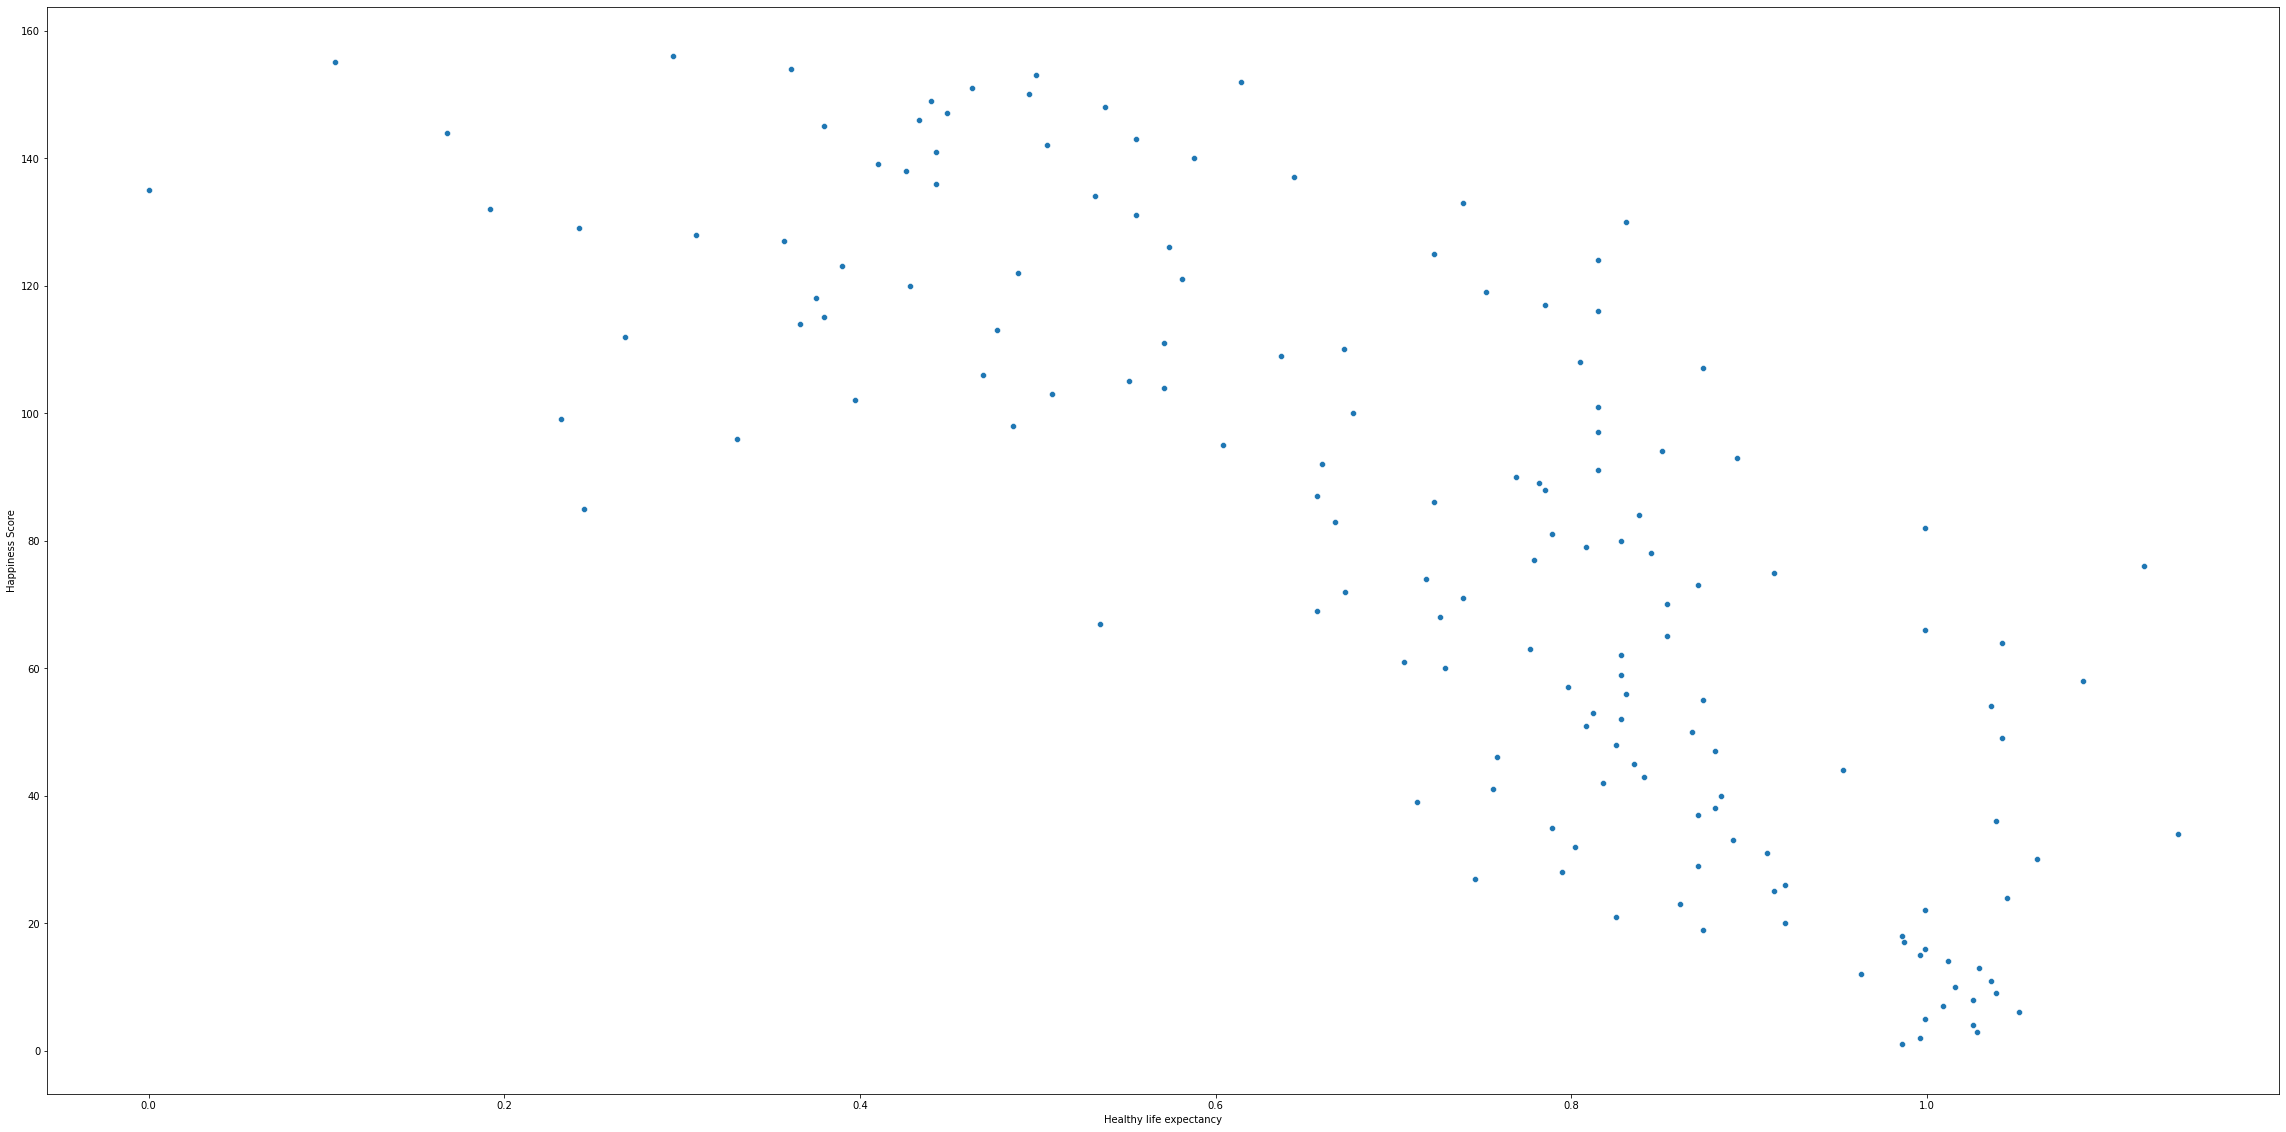

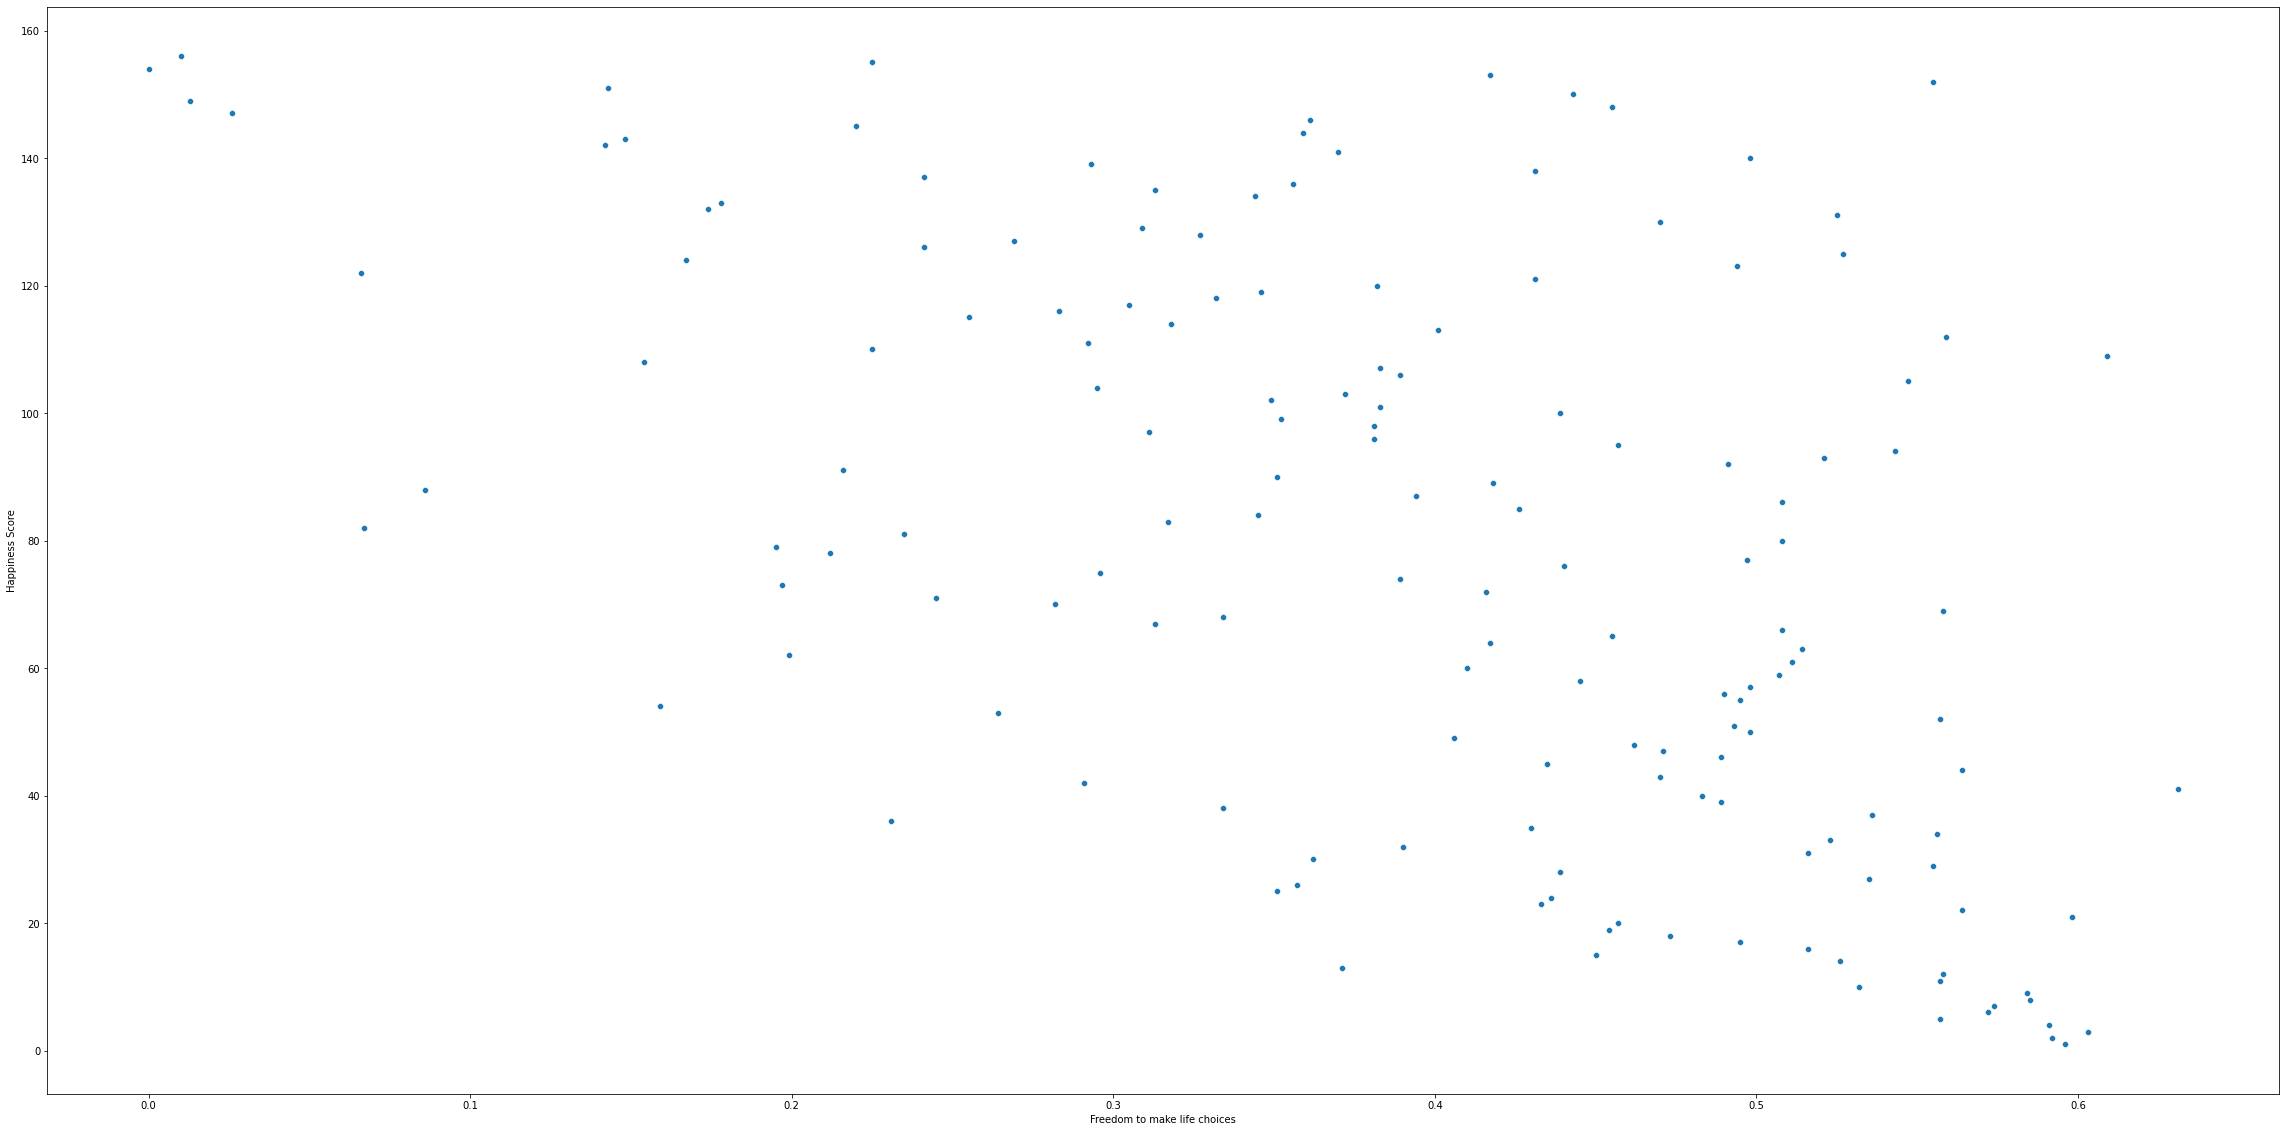

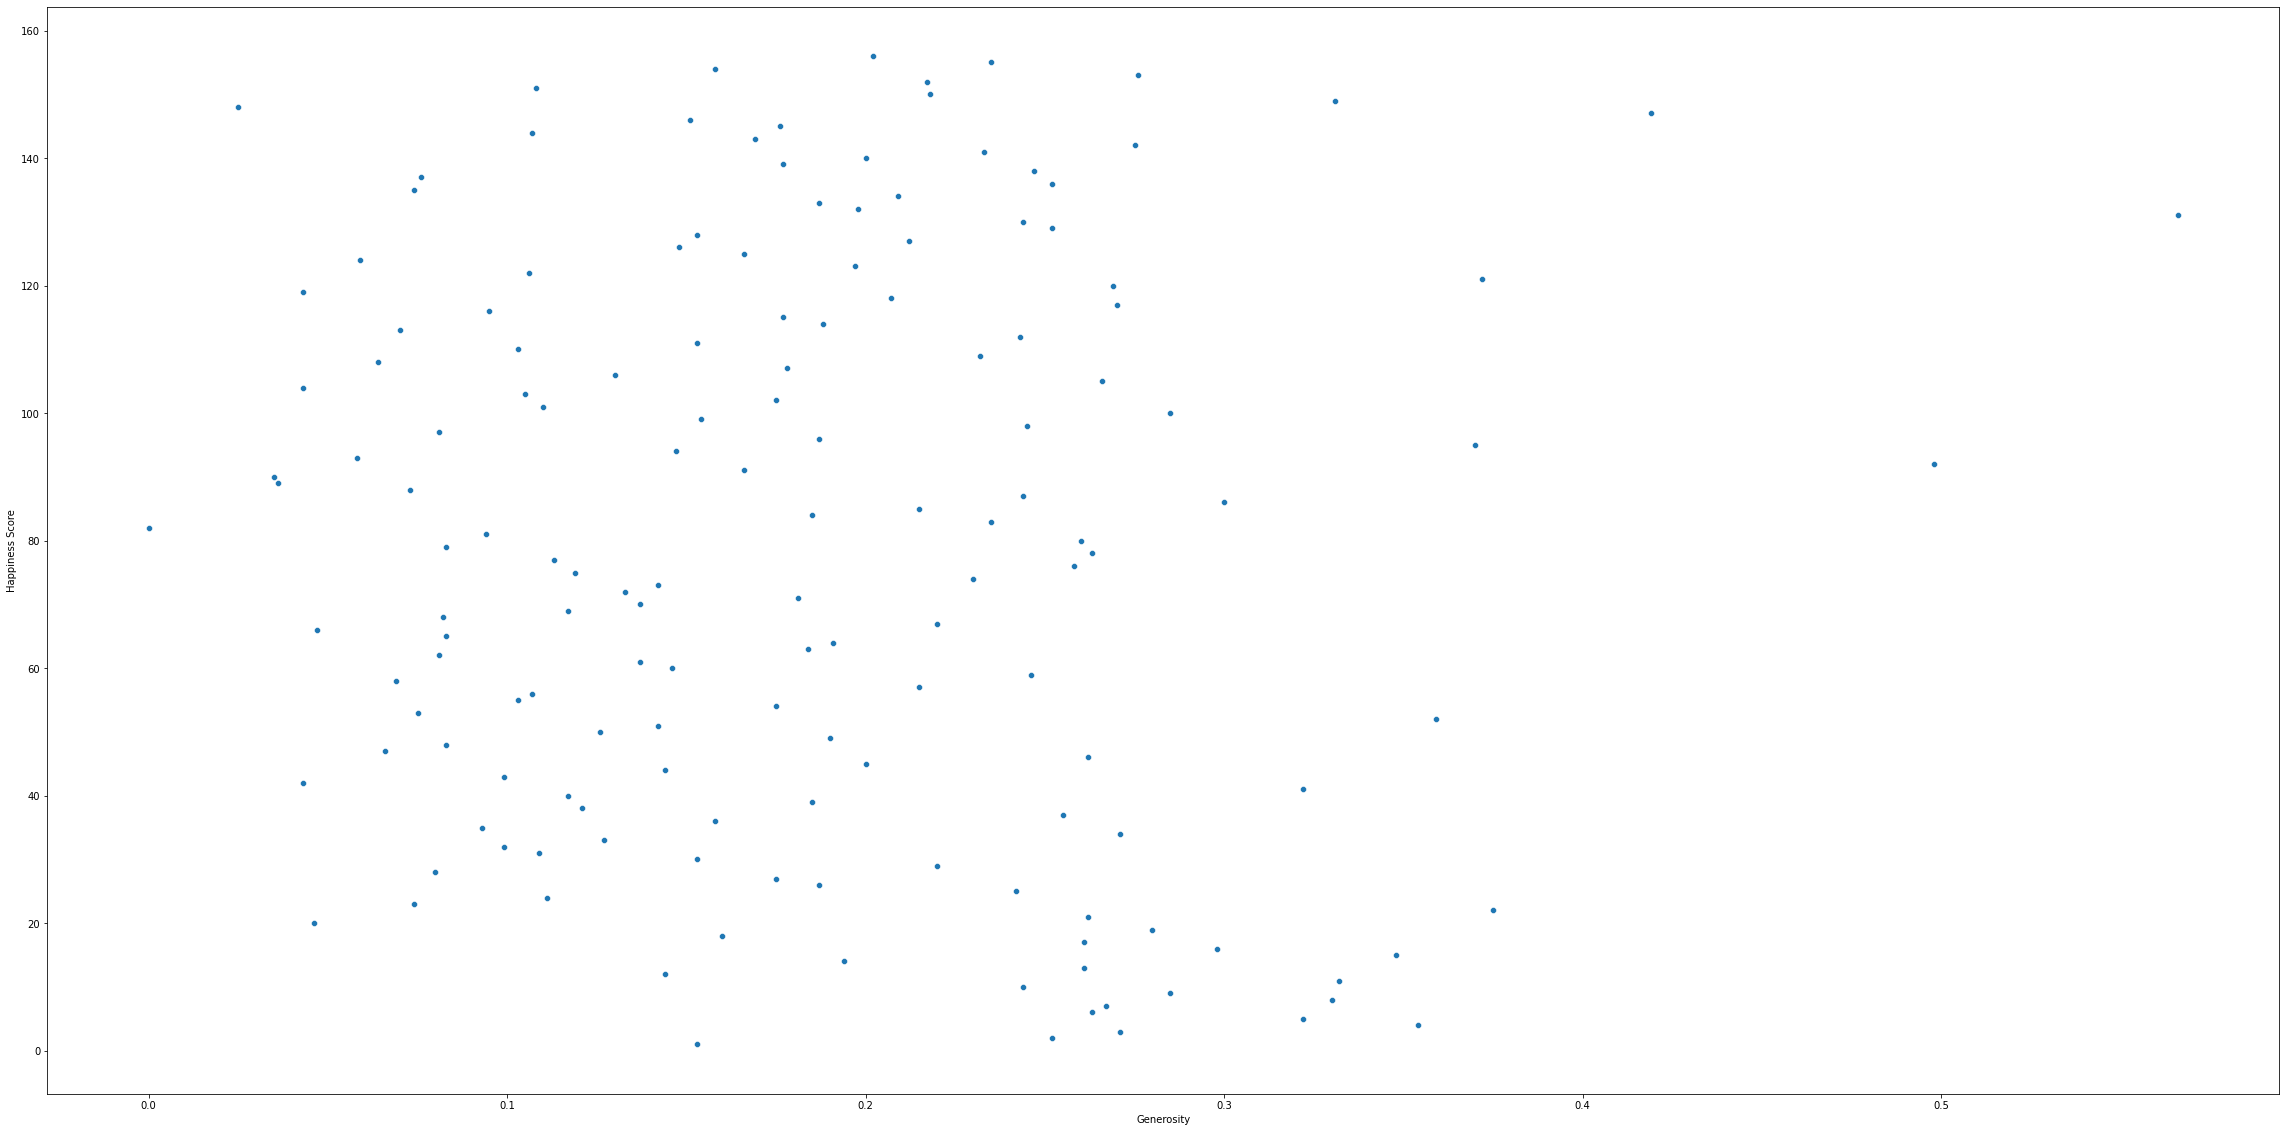

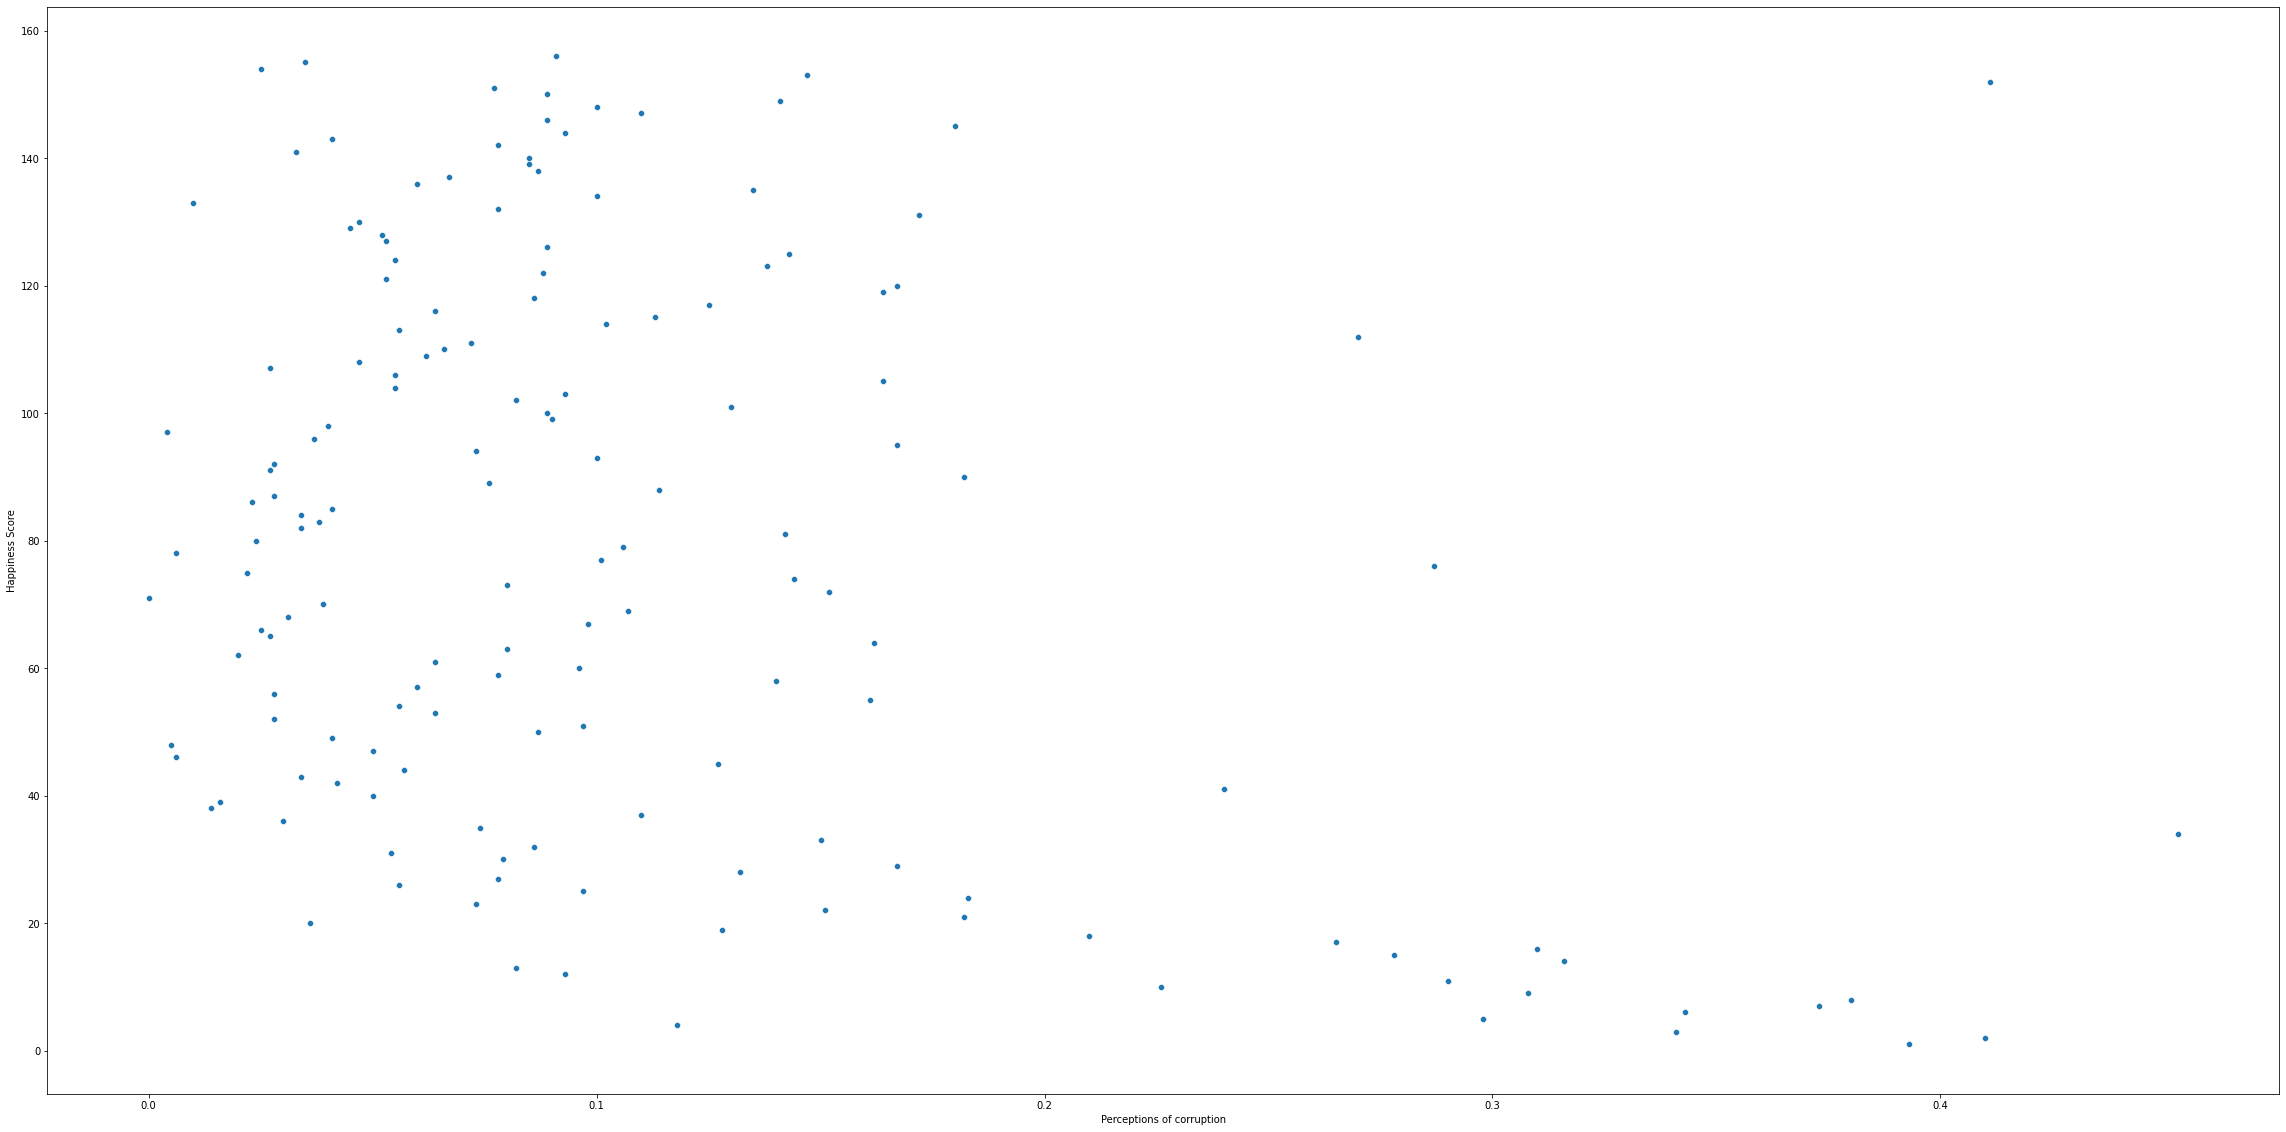

In [189]:
sns.scatterplot(x = 'GDP per capita', y = 'Happiness Score', data = df19)
plt.show()

sns.scatterplot(x = 'Social support', y = 'Happiness Score', data = df19)
plt.show()

sns.scatterplot(x = 'Healthy life expectancy', y = 'Happiness Score', data = df19)
plt.show()

sns.scatterplot(x = 'Freedom to make life choices', y = 'Happiness Score', data = df19)
plt.show()

sns.scatterplot(x = 'Generosity', y = 'Happiness Score', data = df19)
plt.show()

sns.scatterplot(x = 'Perceptions of corruption', y = 'Happiness Score', data = df19)
plt.show()

### Model 

We will attempt to predict happiness score based on given features

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into features and target
X = df19.drop(['Country', 'Happiness Score'], axis=1)
y = df19['Happiness Score']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [24]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_score = lr.score(X_test, y_test)
print('Linear Regression Score: ', lr_score)

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_score = dt.score(X_test, y_test)
print('Decision Tree Score: ', dt_score)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
print('Random Forest Score: ', rf_score)


Linear Regression Score:  0.9755829216917198
Decision Tree Score:  0.997747122180045
Random Forest Score:  0.9993479014288801
